In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [11]:
import pickle
from typing import Iterable, Optional, Tuple, Union

import dynesty
from dynesty import plotting as dyplot
import jax.numpy as jnp
from math import pi
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

from pydd.binary import (
    WEEK,
    DAY,
    MONTH,
    YR,
    DynamicDress,
    VacuumBinary,
    convert,
    Phi_to_c,
    get_rho_6_pbh,
    get_rho_s,
    get_f_isco,
    get_M_chirp,
    GAMMA_S_PBH,
    MSUN,
    PC,
)
from pydd.noise import f_range_ce, f_range_et, S_n_et
from pydd.utils import get_target_pbh_dynamicdress
from dynesty.plotting import _hist2d
from scipy.ndimage import gaussian_filter as norm_kde


plt.style.use("../plot_style.mplstyle")

In [13]:
get_rho_s(get_rho_6_pbh(1 * MSUN), 1 * MSUN, GAMMA_S_PBH) / (MSUN / PC**3)

DeviceArray(834.79530487, dtype=float64, weak_type=True)

In [10]:

get_rho_6_pbh(1 * MSUN) / (1e13 * MSUN / PC**3)

1.3960000000000001

In [42]:
m_1 = 1 * MSUN
m_2 = 1e-3 * MSUN
dd = DynamicDress(
    GAMMA_S_PBH,
    get_rho_6_pbh(m_1),
    get_M_chirp(m_1, m_2),
    m_2 / m_1,
    0.0,
    0.0,
    100e6 * PC,
    get_f_isco(m_1),
)
vb = convert(dd, VacuumBinary)

In [78]:
get_target_pbh_dynamicdress(m_1, m_2, YR, 12.0, S_n_et, (f_range_et[0], 100.0))[
    0
].dL / (1e6 * PC)

94.02856196920885

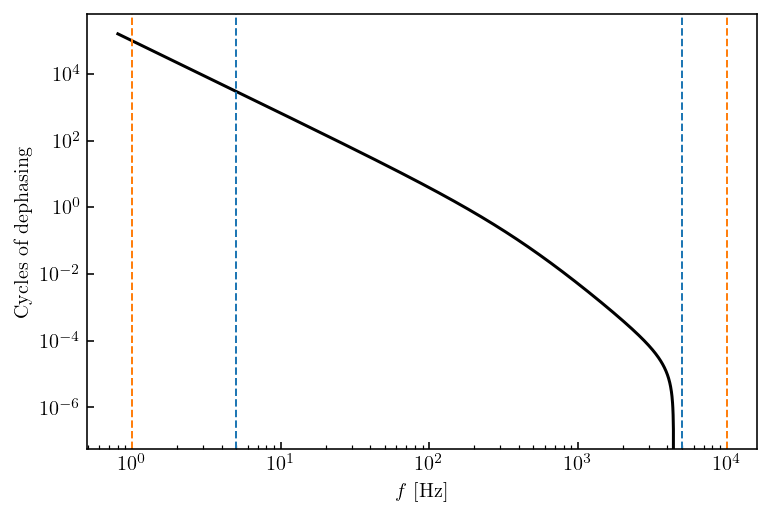

In [80]:
fs = jnp.geomspace(8e-1, 5e3, 2000)

plt.loglog(fs, (Phi_to_c(fs, VB) - Phi_to_c(fs, DD_D)) / (2 * pi), "k")

for i, f_range in enumerate([f_range_ce, f_range_et]):
    for f_bound in f_range:
        plt.axvline(f_bound, color=f"C{i}", linestyle="--", linewidth=1)

plt.xlabel(r"$f$ [Hz]")
plt.ylabel("Cycles of dephasing")
plt.savefig("/Users/amcoogan/Downloads/dephasing.pdf")